# Ejemplo de Regresión Logística
Este cuaderno muestra un ejemplo paso a paso de cómo aplicar regresión logística utilizando Python con `scikit-learn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Crear un conjunto de datos simple
data = {
    'Puntaje': [45, 50, 55, 60, 65, 70, 75, 80, 85, 90],
    'Admitido': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

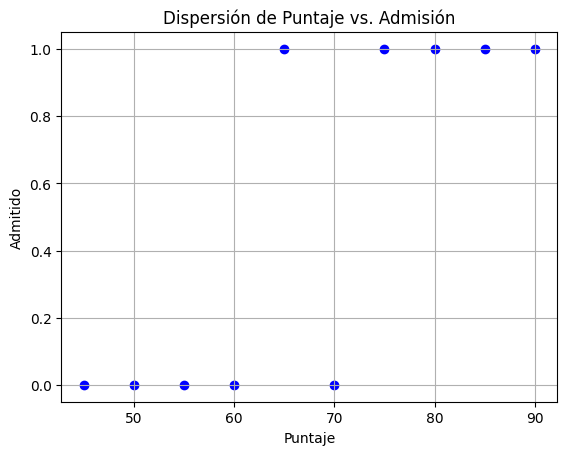

In [3]:
# Visualización inicial
plt.scatter(df['Puntaje'], df['Admitido'], color='blue')
plt.xlabel('Puntaje')
plt.ylabel('Admitido')
plt.title('Dispersión de Puntaje vs. Admisión')
plt.grid(True)
plt.show()

In [4]:
# Separar variables predictoras y respuesta
X = df[['Puntaje']]
y = df['Admitido']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[1 1]
 [0 1]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



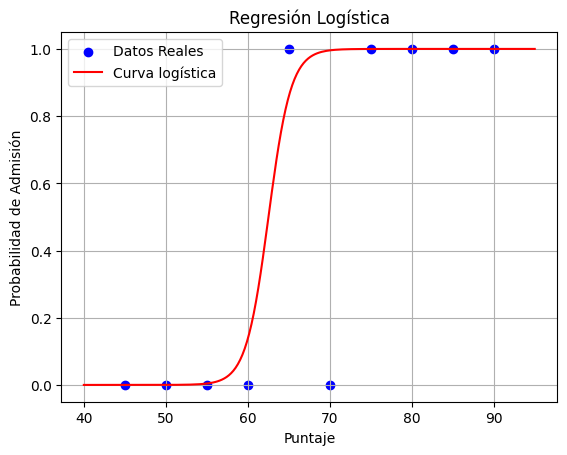

In [7]:
x_vals = np.linspace(40, 95, 200).reshape(-1, 1)
x_vals_df = pd.DataFrame(x_vals, columns=['Puntaje'])  # Convertir a DataFrame con nombre de columna

y_vals = model.predict_proba(x_vals_df)[:, 1]

plt.scatter(df['Puntaje'], df['Admitido'], color='blue', label='Datos Reales')
plt.plot(x_vals, y_vals, color='red', label='Curva logística')
plt.xlabel('Puntaje')
plt.ylabel('Probabilidad de Admisión')
plt.title('Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()